In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Generating DataFrame

In [63]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
df = pd.read_csv("all_data.csv")
df = df.dropna(how='all')
df = df[df['Order Date'].str[0:2]!='Or']


## Generating features

In [69]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df['Total Sale'] = df['Price Each'] * df['Quantity Ordered']

# What was the best month for sales? How much was earned that month?

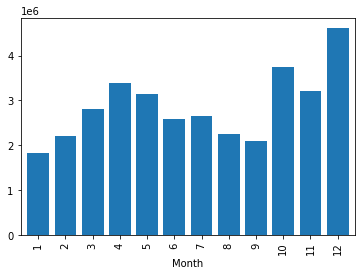

In [79]:
sales_month = df.groupby('Month').agg({'Order ID': 'count',
                                       'Total Sale': 'sum'})
sales_month
sales_month['Total Sale'].plot(kind='bar', width=0.8)
plt.show()